## Preprocessing

In [63]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
import tqdm
from timeit import default_timer as timer

from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [64]:
prefix = 'c:/users/fre_f/PythonProjects/Bacteriological/Data/'
df = pd.read_csv(prefix+'DESL.csv')

In [65]:
df.head()

,Index,DESL,None;Other,Archaea;Euryarchaeota,Bacteria;Acidobacteria,Bacteria;Actinobacteria,Bacteria;Armatimonadetes,Bacteria;Bacteroidetes,Bacteria;Chlamydiae,Bacteria;Chloro1lexi,...,Light treatment,OSDI score,DEQ5 score,TBUT OD,TBUT OS,OSS OD,OSS OS,Schirmer OD,Schirmer OS,Demodicosis
0,P1,3,0.000000,0.000000,0.0,7.611053,0.0,5.904923,0,0.0,...,0,NaN,NaN,3,3,0,0,23,23,0
1,P2,3,0.000000,0.000000,0.0,63.378147,0.0,0.870340,0,0.0,...,0,31.25,17.0,2,4,1,3,14,18,0
2,P3,2,0.023263,0.714645,0.0,8.328215,0.0,6.578825,0,0.0,...,1,33.30,16.0,8,8,3,3,11,8,0
3,P4,3,0.000000,0.000000,0.0,16.352201,0.0,1.376368,0,0.0,...,0,93.75,21.0,3,2,2,2,12,11,0
4,P5,1,0.016438,0.000000,0.0,22.581454,0.0,3.539356,0,0.0,...,1,6.25,7.0,11,11,0,0,22,32,0


In [66]:
df.iloc[:,2:]

,None;Other,Archaea;Euryarchaeota,Bacteria;Acidobacteria,Bacteria;Actinobacteria,Bacteria;Armatimonadetes,Bacteria;Bacteroidetes,Bacteria;Chlamydiae,Bacteria;Chloro1lexi,Bacteria;Cyanobacteria,Bacteria;Deinococcus-Thermus,...,Light treatment,OSDI score,DEQ5 score,TBUT OD,TBUT OS,OSS OD,OSS OS,Schirmer OD,Schirmer OS,Demodicosis
0,0.000000,0.000000,0.0,7.611053,0.0,5.904923,0,0.0,1.015293,1.540256,...,0,NaN,NaN,3,3,0,0,23,23,0
1,0.000000,0.000000,0.0,63.378147,0.0,0.870340,0,0.0,0.000000,0.000000,...,0,31.25,17.0,2,4,1,3,14,18,0
2,0.023263,0.714645,0.0,8.328215,0.0,6.578825,0,0.0,0.000000,0.000000,...,1,33.30,16.0,8,8,3,3,11,8,0
3,0.000000,0.000000,0.0,16.352201,0.0,1.376368,0,0.0,0.000000,0.563752,...,0,93.75,21.0,3,2,2,2,12,11,0
4,0.016438,0.000000,0.0,22.581454,0.0,3.539356,0,0.0,0.000000,0.000000,...,1,6.25,7.0,11,11,0,0,22,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.015896,0.000000,0.0,32.191817,0.0,1.224026,0,0.0,0.000000,0.000000,...,0,40.90,10.0,2,1,1,1,12,17,0
57,0.000000,0.000000,0.0,11.320520,0.0,6.930579,0,0.0,8.588640,0.000000,...,0,18.75,8.0,6,6,0,0,35,35,1
58,0.000000,0.644642,0.0,27.079510,0.0,3.521175,0,0.0,0.000000,0.000000,...,0,75.00,16.0,6,5,2,1,17,14,0
59,0.000000,0.000000,0.0,72.815363,0.0,1.140051,0,0.0,0.110363,0.000000,...,0,20.45,9.0,7,4,0,1,35,27,1


In [67]:
df.iloc[:,1]

0     3
1     3
2     2
3     3
4     1
     ..
56    3
57    2
58    2
59    2
60    3
Name: DESL, Length: 61, dtype: int64

In [68]:
X = df.iloc[:,2:]
y = df.iloc[:,1]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48, 42)
(13, 42)
(48,)
(13,)


In [73]:
def lgbmetrics():
    y_pred = clflgbm.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    cf = confusion_matrix(y_test, y_pred)
    target_names = ['1', '2', '3', '4']
    print(f"Balanced accuracy: {bal_acc}")
    print(f"MCC: {mcc}")
    print(f"F1: {f1}")
    print(f"Confusion matrix: \n{cf}")
    #print(f"Classification report: \n{classification_report(y_test, y_pred, target_names=target_names)}")

## Train and predict

In [74]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
clflgbm = LGBMClassifier().fit(X_train, y_train)
clflgbm.predict(X_test)

lgbmetrics()

Balanced accuracy: 0.8333333333333334
MCC: 0.8807048459279793
F1: 0.8585858585858586
Confusion matrix: 
[[1 1 0]
 [0 5 0]
 [0 0 6]]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

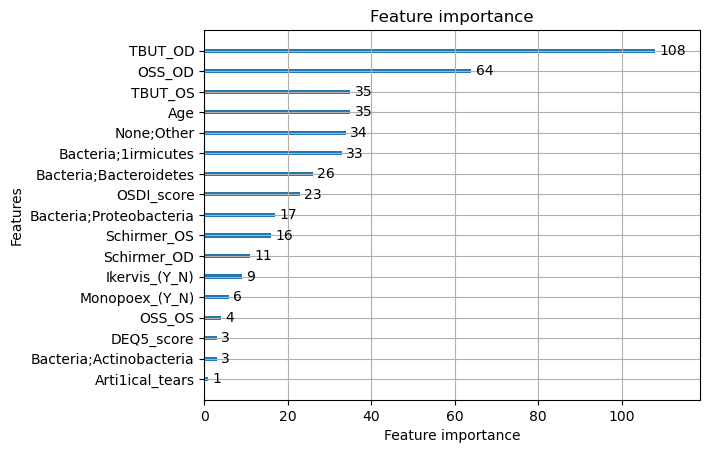

In [75]:
lgb.plot_importance(clflgbm)